# Assignment 5

In this assignment, we try to use non-linear dimensionality reduction techniques such as **t-SNE** and **Isomap** to visualise and inspect the genetic data of yeasts to determine the veracity in the data.

## Part A

Firstly, we perform some data preprocessing by loading the ```yeast.arff``` file and separating the features from the classes. We then find out the two most frequently occuring **single-class labels** and **multi-class combinations** and use them to study separability while considering the remaining classes to fall in the 'other' category. 

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Exploratory Data Analysis

In [46]:
from scipy.io import arff

dataset = arff.loadarff('yeast.arff')

dataset = pd.DataFrame(dataset[0])

X = dataset.iloc[:,:103]
Y = dataset.iloc[:,103:]

Y = Y.map(int)


print("Number of features:",X.shape[1])
print("Number of datapoints:", X.shape[0])



Number of features: 103
Number of datapoints: 2417


The table below shows the number of features and the number of datapoints in the feature matrix ```X```

| Metric             | Value |
|--------------------|-------|
| Number of features | 103   |
| Number of datapoints | 2417  |

### Extracting and Colouring of **Single-Class Labels** and **Multi-Class Combinations**

The class labels in `Y` represent certain characteristics in yeast. The data is primarily used to determine the association between the genetic makeup of yeast and these attributes. There are a total of fourteen classes in `Y`.

**Single-class labels** occur when a gene belongs to just one of the fourteen classes, whereas **multi-class combinations** apply when a gene is associated with several classes. We can extract the **single-class labels** by first creating a list of classes each gene belongs to, and then considering only those lists with a length of one. The unique values that appear within these single-item lists represent the distinct single-class labels in the dataset.

In [47]:
class_lists = Y.apply(lambda row: row.index[row == 1].tolist(), axis=1)

labels_df = pd.DataFrame({'Class List': class_lists})
labels_df['lengths'] = labels_df.apply(lambda row: len(row['Class List']),axis = 1)



In [48]:
single_class = labels_df[labels_df['lengths'] == 1].apply(lambda row: row['Class List'][-1], axis = 1)
   
single_class_counts = single_class.value_counts()
print("Single-Class Labels")
print("----------------------------------------------------------------------------------------")
print(single_class_counts)
print("----------------------------------------------------------------------------------------")
print("Multi-Class Labels")
print("----------------------------------------------------------------------------------------")

multi_class = labels_df[labels_df['lengths'] != 1].apply(lambda row: tuple(row['Class List']),axis = 1)
multi_class_counts = multi_class.value_counts()
print(multi_class_counts)
print("----------------------------------------------------------------------------------------")

top_single_class = [single_class_counts.keys()[0]]
top_multi_class = multi_class_counts.keys()[0]
top_multi_class = list(top_multi_class)


Single-Class Labels
----------------------------------------------------------------------------------------
Class1    32
Name: count, dtype: int64
----------------------------------------------------------------------------------------
Multi-Class Labels
----------------------------------------------------------------------------------------
(Class3, Class4, Class12, Class13)                                                     237
(Class4, Class5, Class12, Class13)                                                     233
(Class1, Class2, Class12, Class13)                                                     172
(Class1, Class2)                                                                       131
(Class2, Class3, Class12, Class13)                                                     117
                                                                                      ... 
(Class1, Class2, Class3, Class7, Class8, Class10, Class11)                               1
(Class3, Class4, C

There appears to be only one **single-class label** in the dataset: **Class 1**. The most frequent **multi-class combination** is **(Class 3, Class 4, Class 12, Class 13)**. We will concern ourselves mainly with these two labels by coloring them distinctly.

In [49]:
Y['Colour'] = labels_df['Class List'].apply(lambda x: 0 if x == top_single_class else 1 if x == top_multi_class else 2)

### Scaling the data

It is important to scale the columns of the feature matrix ```X``` since we are using distance based dimensionality reduction techniques. In **t-SNE**, euclidean distance between points is used to compute **pairwise-similarity**. Thus, a feature with a large variance would dominate in the distance calculations, effectively ignoring the contributions from the other small-scaled features.

Similarly, **Isomap** also uses euclidean distance as a metric to calculate its nearest neighbours. This, again, would result in some bias towards the large-scaled features as the small-scaled features would be dominated in the calculations, incorrectly identifying its neighbours.

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X[X.columns] = scaler.fit_transform(X)

In [51]:
X

Att1      Att2      Att3      Att4      Att5      Att6      Att7  \
0     0.030752 -1.742591 -1.601326 -1.468980  0.594010  0.271117  2.023802   
1    -1.079454  0.125835 -1.010264 -0.564893 -0.094933  0.499948 -0.326167   
2     5.224059  4.109170  3.008988  0.902018  0.107939 -0.070783 -0.075781   
3     1.210780  0.049537 -0.020516  0.742552  0.446738 -0.533913  0.757376   
4     0.419587  0.076533 -0.708369  0.832919 -0.510222  0.914530 -0.062317   
...        ...       ...       ...       ...       ...       ...       ...   
2412 -1.241975  0.017319 -1.262593 -0.162742 -0.628667  0.930832 -0.457120   
2413  0.864084  0.603135  0.875152 -0.218276  0.699192  0.304770  0.792065   
2414  0.835324 -0.972103 -0.222684 -0.485387 -0.408590  0.417417  0.570273   
2415 -1.355394  0.095069 -0.094141 -0.610577 -0.438150  0.429598  1.200310   
2416 -1.773790 -0.675419  1.723832  2.543268  0.808420  0.165007 -0.926560   

          Att8      Att9     Att10  ...     Att94     Att95     Att96  \
0     0.428070  0.683885 -0.584890  ...  0.074380 -0.139039 -0.142884   
1    -0.809579 -0.847347 -0.167984  ...  0.090608  0.281957 -0.886751   
2     0.136654 -0.433427 -0.252502  ...  1.040237 -0.469629 -0.924791   
3    -0.083592  0.813679  0.642590  ... -0.890019  2.067892 -0.781802   
4     0.661644 -1.396200  0.711754  ... -0.639827  0.454017 -0.589400   
...        ...       ...       ...  ...       ...       ...       ...   
2412  2.364046 -0.753573  1.887883  ...  0.266435 -0.583250 -0.572599   
2413  0.112889  0.535192  0.682979  ... -0.849106 -0.785280  3.072094   
2414  0.117053 -0.319115 -0.125942  ... -0.062710 -0.386019 -0.668639   
2415  0.381966 -0.899617  1.411980  ...  0.920297  0.338307 -0.126780   
2416 -2.204384 -2.920952 -1.932699  ...  3.869091 -0.606661 -0.026914   

         Att97     Att98     Att99    Att100    Att101    Att102    Att103  
0    -0.162409 -0.115009  0.020075 -0.320076 -0.178076  0.320417  1.178867  
1     1.143263  0.521680  0.307877 -0.645355 -0.423947 -0.859425  0.096189  
2    -0.101735 -0.128129  3.284185 -0.278757  0.299908 -0.717769 -1.308110  
3     2.028035  1.583559 -0.286180 -0.755161 -0.930956 -0.538974 -0.518363  
4     0.283393  0.304769 -0.514501  0.250775 -0.637002 -0.380569  0.606249  
...        ...       ...       ...       ...       ...       ...       ...  
2412 -0.520719  0.189561  0.744308 -0.618848 -0.845014 -0.710028 -0.063796  
2413 -0.797458 -0.795931 -0.752182 -0.528602 -0.408606  3.670945 -1.784379  
2414 -0.717936 -0.715192 -0.406552  2.844987 -0.694523  2.789908 -1.337813  
2415  1.394115  2.214700 -1.124309 -0.834826 -1.282421 -0.244132 -0.056891  
2416 -0.172801  0.560149 -0.172910 -0.834259 -0.868477 -0.680941  0.112787  

[2417 rows x 103 columns]

The data has been scaled column-wise.

## Part B

We will now implement **t-SNE** and **Isomap** to reduce the data to two-dimensions and visualise the features based on the aforementioned classes (**single-class labels** and **multi-class labels**). This visualisation will help us see the separability and the veracity of the data.

### t-SNE Implementation

In [56]:
from sklearn.manifold import TSNE
import pandas as pd

perp_vals = [5, 15, 30, 50, 55, 60]
results = {}

for p in perp_vals:
    print(f"Running t-SNE for perplexity={p}...")
    tsne_model = TSNE(n_components=2, perplexity=p, random_state=42)
    tsne_res = tsne_model.fit_transform(X)
    
    df_p = pd.DataFrame(tsne_res, columns=['d1', 'd2'])
    df_p['c'] = Y['Colour'].values
    results[p] = df_p

print("All t-SNE computations are complete.")

Running t-SNE for perplexity=5...
Running t-SNE for perplexity=15...
Running t-SNE for perplexity=30...
Running t-SNE for perplexity=50...
Running t-SNE for perplexity=55...
Running t-SNE for perplexity=60...
All t-SNE computations are complete.


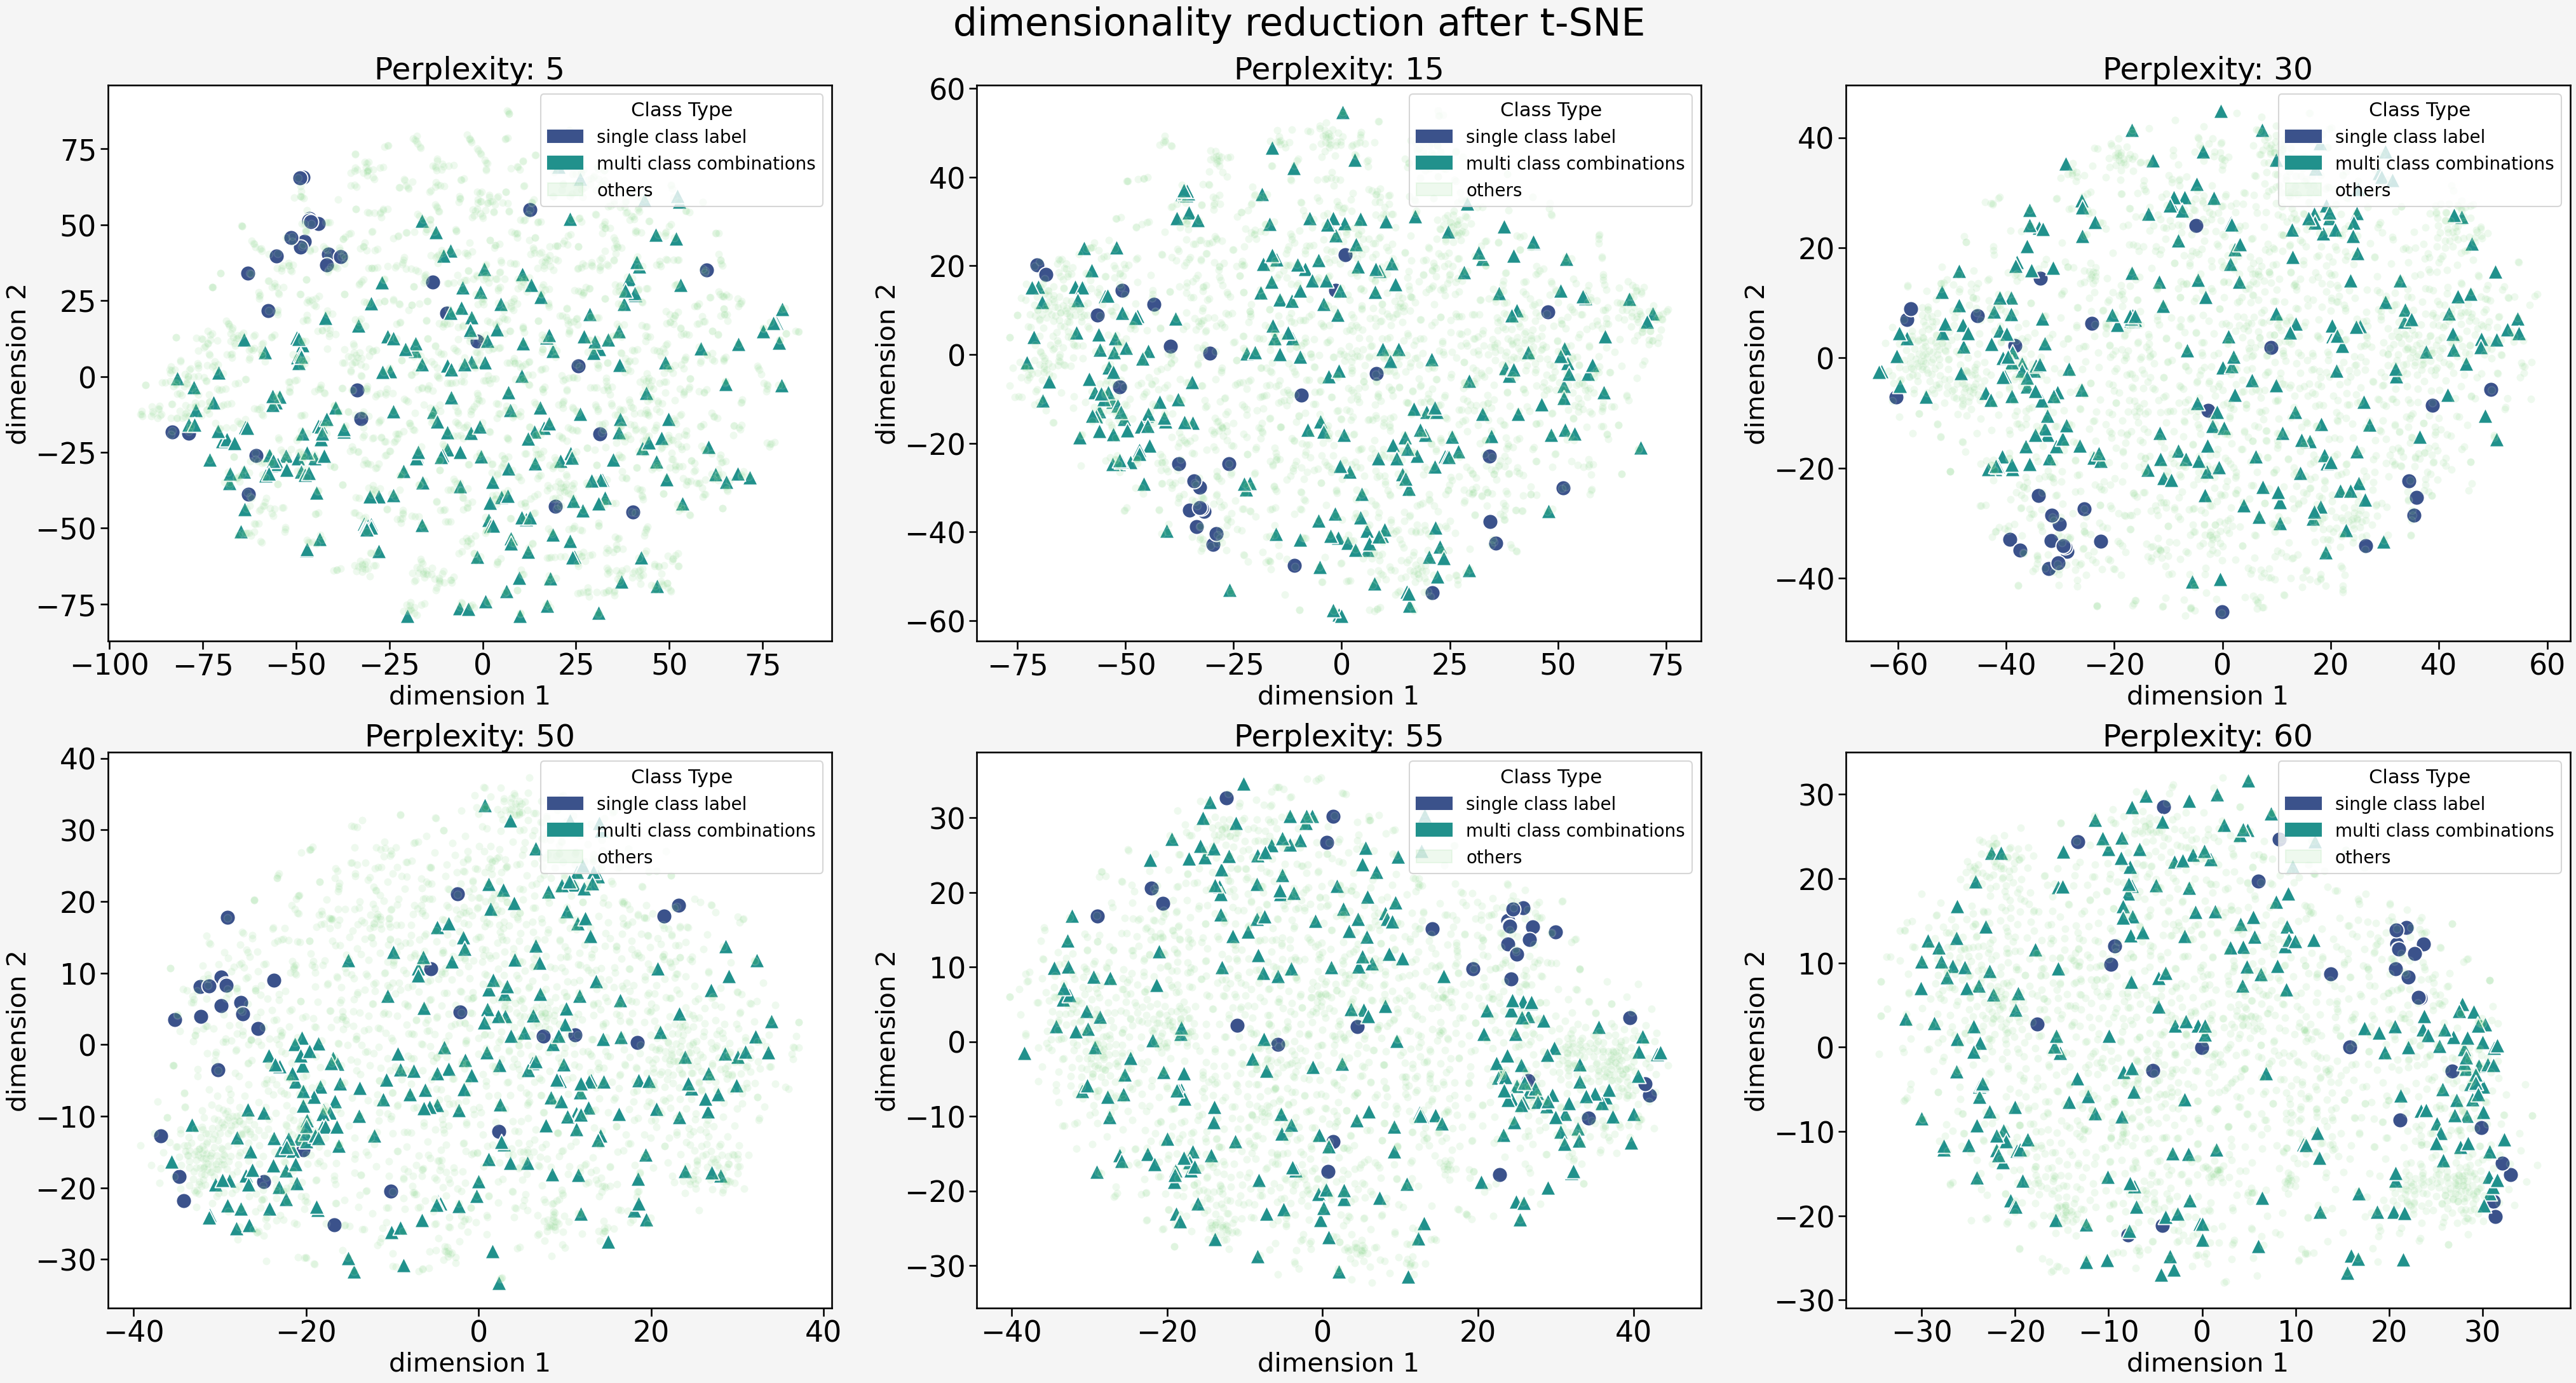

In [57]:
from matplotlib.patches import Patch

def plot_embedding(ax, data, title):
    colors = sns.color_palette("viridis", 3)
    
    sns.scatterplot(
        x='d1', y='d2',
        data=data[data['c'] == 0],
        color=colors[0],
        marker='o',
        ax=ax,
        s=300
    )
    sns.scatterplot(
        x='d1', y='d2',
        data=data[data['c'] == 1],
        color=colors[1],
        marker='^',
        ax=ax,
        s=300
    )
    sns.scatterplot(
        x='d1', y='d2',
        data=data[data['c'] == 2],
        color=colors[2],
        marker='.',
        ax=ax,
        alpha=0.1,
        legend=False,
        s=300
    )
    
    ax.set_title(title)

    ax.set_xlabel('dimension 1')
    ax.set_ylabel('dimension 2')
    handles = [
        Patch(color=colors[0], label='single class label'),
        Patch(color=colors[1], label='multi class combinations'),
        Patch(color=colors[2], label='others', alpha=0.1)
    ]
    
    ax.legend(
        handles=handles,
        title='Class Type',
        title_fontsize='22',
        fontsize='20',
        loc='upper right',

    )

sns.set_context("talk", font_scale = 2)
plt.rcParams.update({
    'axes.titlesize': 35, 
    'axes.labelsize': 30,
    'text.color': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black'
})

f, ax = plt.subplots(2, 3, figsize=(50, 25))
ax = ax.flatten()
f.set_facecolor('#F5F5F5')
plt.suptitle("dimensionality reduction after t-SNE",y = 0.93)

for i, p in enumerate(results.keys()):
    ax[i].set_facecolor('#FFFFFF')
    df_to_plot = results[p]
    plot_embedding(ax[i], df_to_plot, f'Perplexity: {p}')

plt.show()

The results show varying degrees of mixing between the two classes. A low perplexity value of 5 causes the model to focus on local structure. This works reasonably well, as most points of a **single-class label** are clustered near the top-left of the scatterplot, albeit with a moderate number of outliers.

As the perplexity value is increased, there is greater mixing between the classes, as points begin to consider more distant neighbors from the opposite class. However, at a high **perplexity of 50** and above, a distinct cluster of the **single-class label** is again observed. This suggests that a reasonable global decision boundary separates the two classes, while the points within that **single-class label** also exhibit strong local cohesion.

### Veracity Inspection

1.  **Noisy/Ambiguous Data**: The plots reveal multiple points deeply embedded in regions of the opposite class. For example, at a **Perplexity of 5**, there are **blue points** located near (-30, 0) and (-30, -15), where they are surrounded by **green triangles**. This suggests their features are more similar to the other class than their own label indicates.

2.  **Outliers**: The dimensionally reduced dataset contains a significant number of outliers. For instance, at a **Perplexity of 55**, the main cluster of **blue points** spans from (20, 10) to (30, 20). However, several other **blue points** are situated far from this cluster, between **x=-0** and **x=-30**. This behavior could be due to several reasons, including incorrect labeling or sample contamination. Given the high number of such outliers, contamination is a plausible hypothesis.

3.  **Hard-to-Learn Samples**: Almost all plots show thorough mixing, with clusters of **blue points** embedded within the region of **green triangles**. A simple classifier would perform poorly on this data, as the decision boundary required to separate the intermingled points would be too complex. The plots for **Perplexity = 5**, **Perplexity = 30** and **Perplexity = 50** are partial exceptions; the **blue points** form distinct clusters, suggesting a non-linear or even a simple linear boundary could achieve reasonable separation in those specific representations.

### Isomap Implementation

**Isomap** tackles dimensionality reduction by preserving the geodesic distance between data points. It begins by constructing a neighborhood graph, connecting each point to its nearest neighbors. It then approximates the geodesic distance by finding the shortest path between pairs of points along this graph. This method allows Isomap to effectively "unroll" the data manifold, which is excellent for preserving the **global structure** of the data.


**t-SNE**, on the other hand, focuses on preserving **local structure**. It models similarities between neighboring points as conditional probabilities, calculated using a **Gaussian distribution** in the high-dimensional space. It then creates a low-dimensional map where these local similarities are mirrored using a heavy-tailed **t-distribution**. This process causes similar points to attract and dissimilar points to repel strongly, which is highly effective at revealing clusters. However, this intense focus on locality often distorts the true **global structure** in the process.



In [59]:
from sklearn.manifold import Isomap
import pandas as pd

n_vals = [3, 5, 10, 20, 40, 50]
results_iso = {}

for n in n_vals:
    print(f"Running Isomap for number of neighbors={n}...")
    iso_model = Isomap(n_components=2, n_neighbors=n)
    iso_res = iso_model.fit_transform(X)
    
    df_iso = pd.DataFrame(iso_res, columns=['d1', 'd2'])
    df_iso['c'] = Y['Colour'].values
    results_iso[n] = df_iso

print("All Isomap computations are complete.")

Running Isomap for number of neighbors=3...
Running Isomap for number of neighbors=5...
Running Isomap for number of neighbors=10...
Running Isomap for number of neighbors=20...
Running Isomap for number of neighbors=40...
Running Isomap for number of neighbors=50...
All Isomap computations are complete.


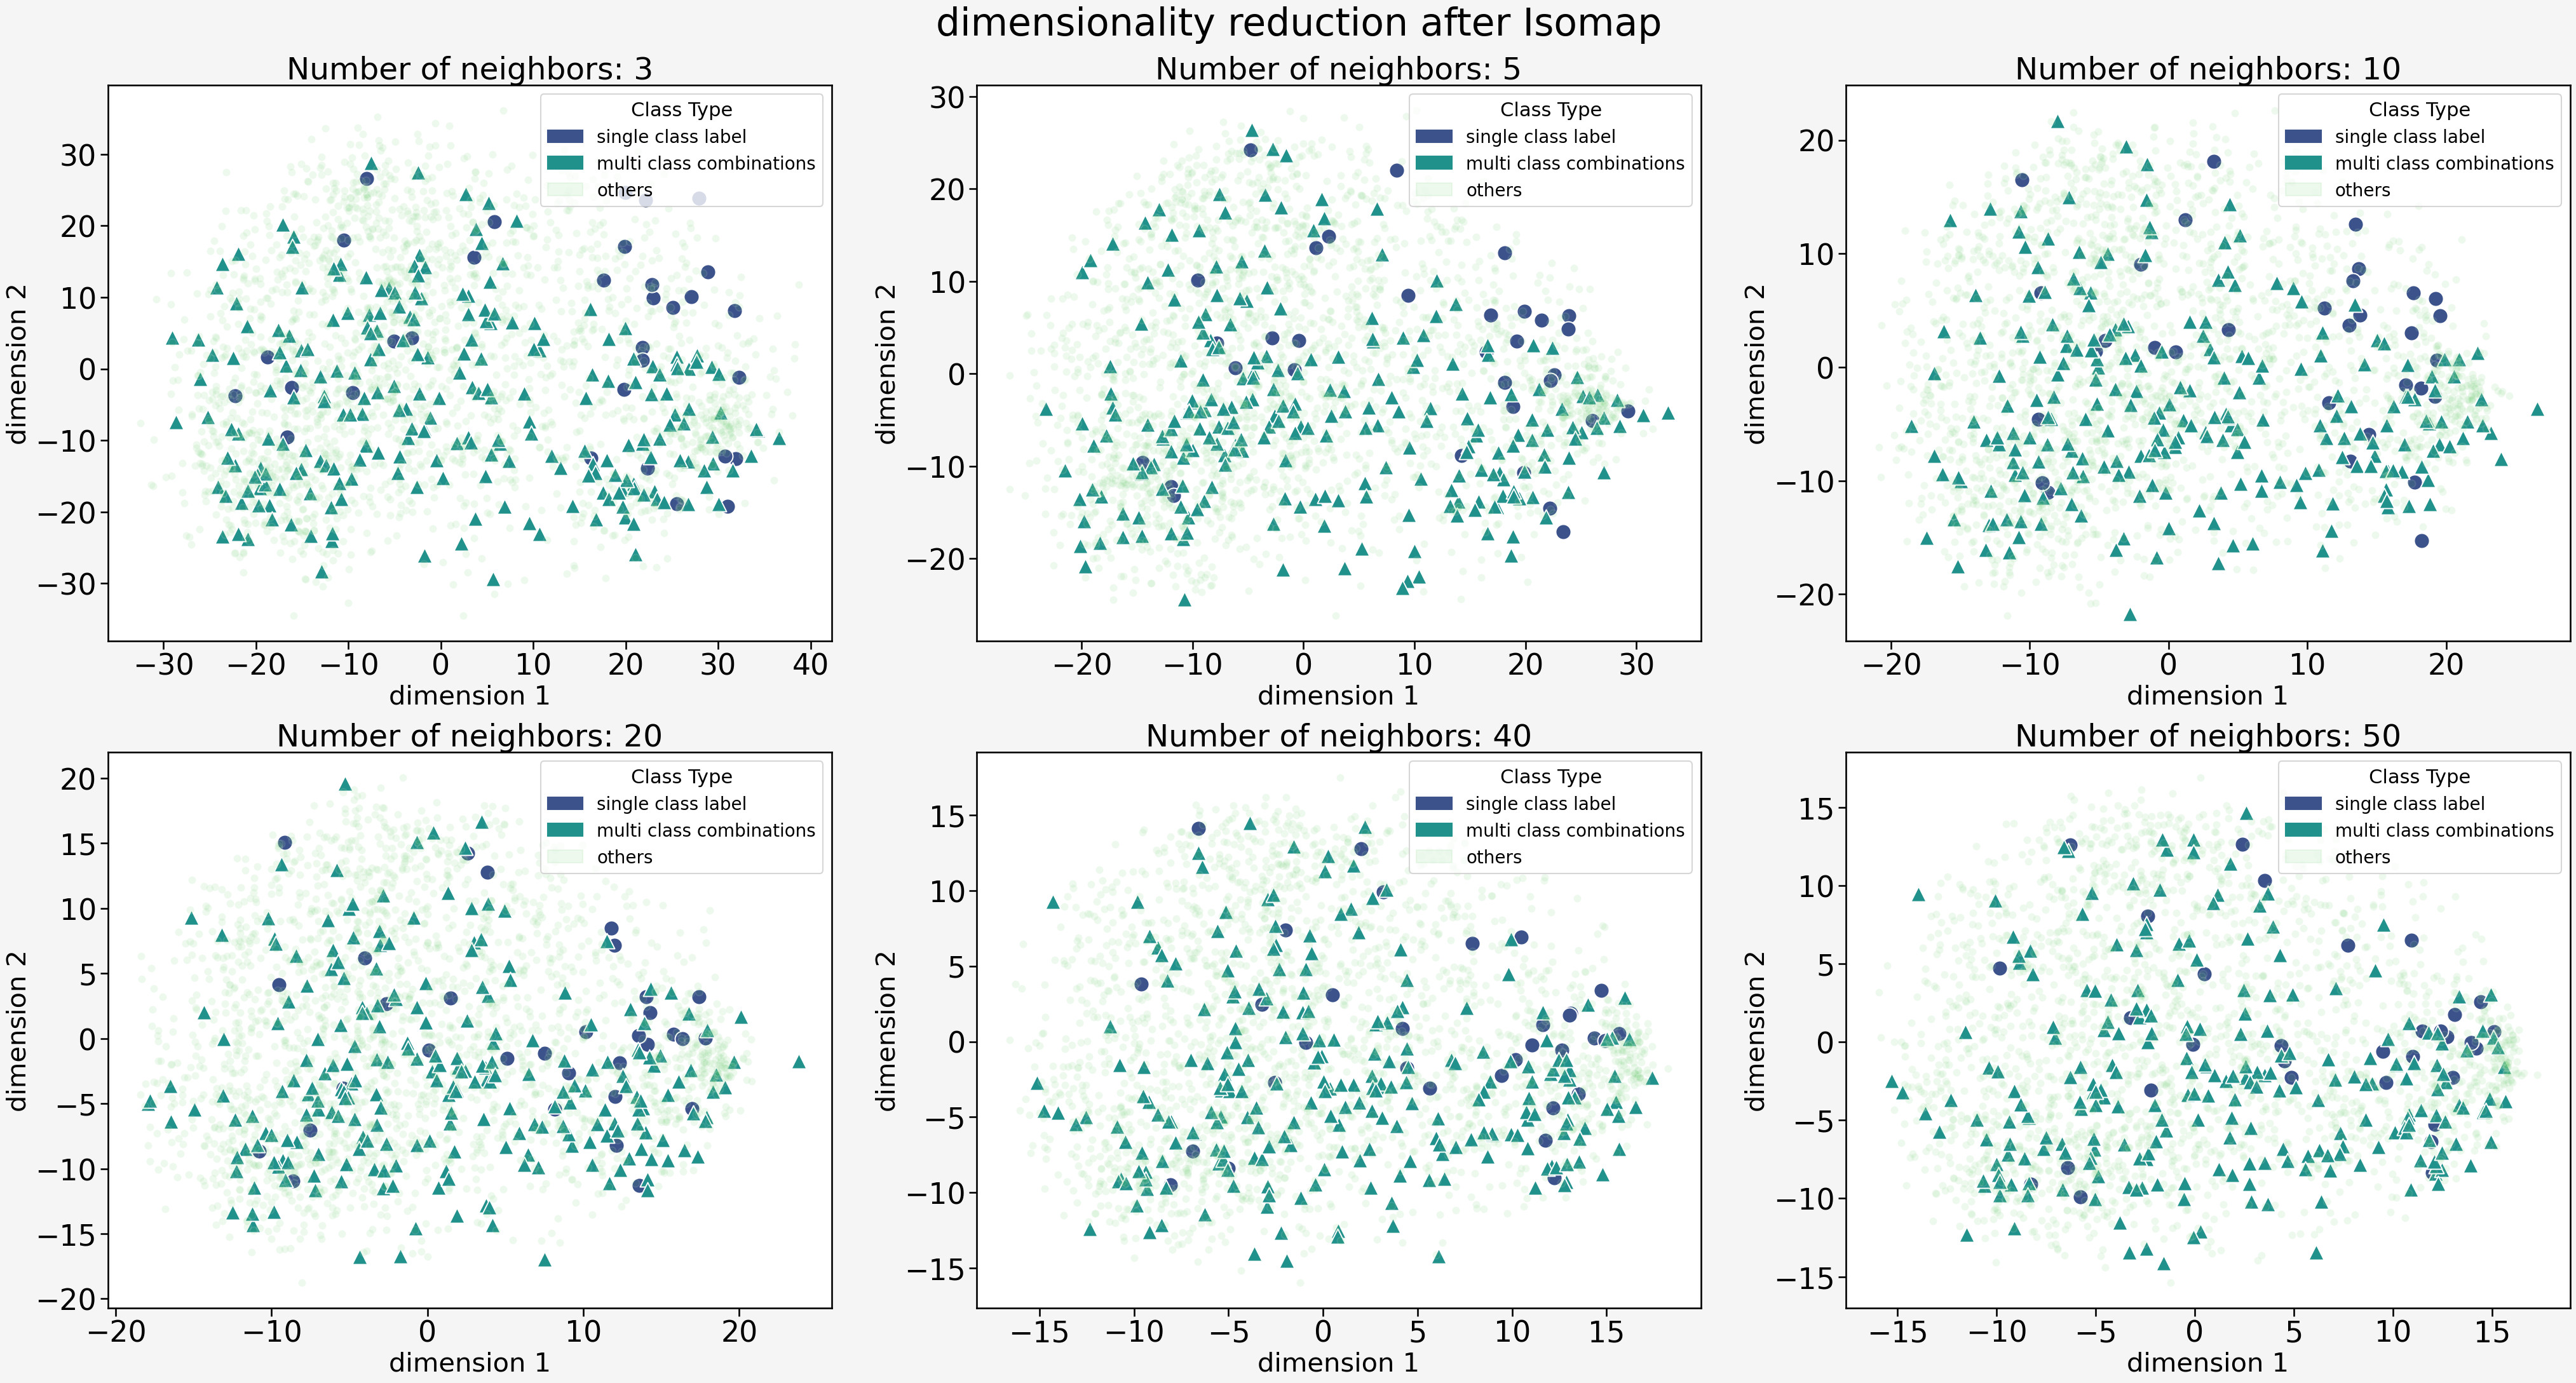

In [55]:
sns.set_context("talk", font_scale = 2)
plt.rcParams.update({
    'axes.titlesize': 35, 
    'axes.labelsize': 30,
    'text.color': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black'
})

f, ax = plt.subplots(2, 3, figsize=(50, 25))
ax = ax.flatten()
f.set_facecolor('#F5F5F5')
plt.suptitle("dimensionality reduction after Isomap",y = 0.93)

for i, n in enumerate(results_iso.keys()):
    ax[i].set_facecolor('#FFFFFF')
    df_to_plot = results_iso[n]
    plot_embedding(ax[i], df_to_plot, f'Number of neighbors: {n}')

plt.show()

The results after applying **Isomap** are notably less effective than those from **t-SNE**. Even for a low **number of neighbors**, there is little to no discernible clustering and a significant amount of mixing between the classes. The plot for a **number of neighbors = 5** provides the best outcome, where points of the **single-class label** show some proximity to each other. However, even in this case, substantial mixing with the other class persists.


### Comparing **t-SNE** and **Isomap**

* **Isomap** arguably gives a better representation of the **global structure**, as its primary goal is to preserve geodesic distances. In contrast, **t-SNE** can distort this view by creating distinct, well-separated clusters to emphasize **local similarities**. The Isomap plot, showing thorough mixing and a lack of clear clusters, suggests that the classes are not globally separable and that there may be potential issues with **data veracity**, such as noisy or ambiguous labels.

* The **data manifold** is the low-dimensional surface on which the high-dimensional data is assumed to lie. The persistent mixing of the two classes in the **Isomap** plots suggests the manifold is **complex** or **highly curved**. This complexity makes classification difficult because the boundary between the classes is inherently **non-linear** and **convoluted**. A simple classifier would struggle to find a clean separation in a space where the two classes are so intrinsically intertwined.

## Conclusion


* **t-SNE** was highly effective at revealing **local cluster structures**, especially at low (5) and high (30,50) perplexity values. It suggests that while the classes are globally distinct, there are significant local ambiguities and outliers.

* **Isomap** revealed the **global structure** of the data, showing the two classes to be heavily intermingled. This indicates the data lies on a complex manifold where the classes are not easily separable, which poses a significant challenge for simple classifiers.

* Comparing the two, **t-SNE** is better for visualizing distinct class clusters, while **Isomap** provides a more honest representation of the global entanglement between the classes.

* The analysis of both methods suggests potential **data veracity issues**, such as noisy labels or contamination, evidenced by the numerous outliers and mixed-class regions.